In [1]:
from starkiller import sat_killer
import cv2
import matplotlib.pyplot as plt
%matplotlib notebook
from glob import glob
import numpy as np

In [2]:
files = glob('muse_preview_archive/*.png')

In [26]:
x1 = 106+20; x2 = 701-20
y1 = 150+20; y2 = 729-20

<IPython.core.display.Javascript object>


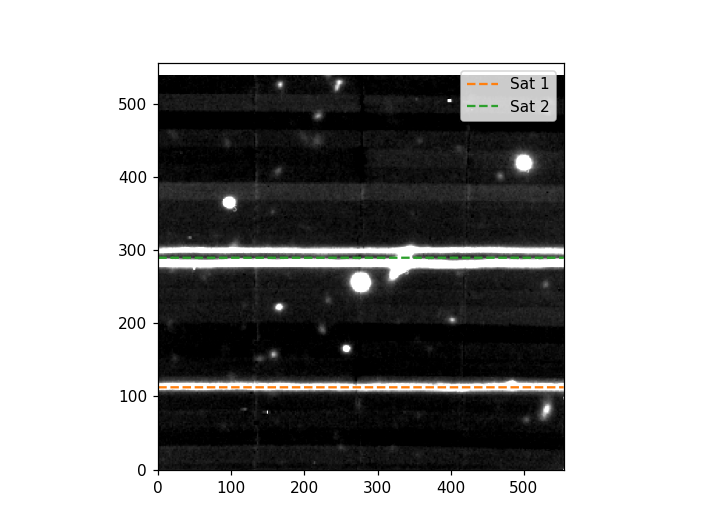

In [27]:
file = 'muse_preview_archive/ADP.2018-03-08T19:46:26.986.png' # bright 
file = 'muse_preview_archive/ADP.2023-03-30T08:14:00.100.png' # faint
#file = 'muse_preview_archive/ADP.2018-01-26T19:53:42.815.png' # saturated star
#file = 'muse_preview_archive/ADP.2018-03-02T15:52:52.642.png' # star field 
file = 'muse_preview_archive/'+ 'ADP.2019-01-02T10/51/41.088.png'.replace('/',':') # bad line
file = 'muse_preview_archive/'+ 'ADP.2019-08-28T05/49/34.349.png'.replace('/',':') # multi satellite

image = cv2.imread(file,0)
cutout = image[y1:y2,x1:x2]
name = 'sat_streaks/' + file.split('/')[-1]
sat = sat_killer(1,1,run=False)

sat.quick_detection(cutout,10,savename=name)

In [235]:
def __saturation_test(sat,saturation_frac=0.1):
    good = []
    for c in sat.streak_coef:
        xx = np.arange(0,sat.image.shape[1],1)
        yy = xx*c[0] + c[1]
        yy = (yy+0.5).astype(int)
        lc = sat.image[yy,xx]
        saturated = np.nansum(lc >= 255) / len(lc)
        if saturated < saturation_frac:
            good += [True]
        else:
            good += [False]
    print(good)
    sat.streak_coef = sat.streak_coef[good]
    
def __lc_variation_test(sat,variation_frac=0.2):
    good = []
    for c in sat.streak_coef:
        xx = np.arange(0,sat.image.shape[1],1)
        yy = xx*c[0] + c[1]
        yy = (yy+0.5).astype(int)
        ind = (yy > 0) & (yy < sat.image.shape[0])
        lc = sat.image[yy[ind],xx[ind]]
        mean, med, std = sigma_clipped_stats(lc)
        if std == 0:
            std = 1
        if std > 30:
            std = 30
        var = abs(lc - med)
        frac = np.sum(var >= 3*std) / len(lc)
        if frac < variation_frac:
            good += [True]
        else:
            good += [False]
    print(good)
    sat.streak_coef = sat.streak_coef[good]

def __lc_stars_vetting(sat,sigma=2):
    good = []
    for c in sat.streak_coef:
        xx = np.arange(0,sat.image.shape[1],1)
        yy = xx*c[0] + c[1]
        yy = (yy+0.5).astype(int)
        ind = (yy > 0) & (yy < sat.image.shape[0])
        lc = sat.image[yy[ind],xx[ind]]
        
        mean, med, std = sigma_clipped_stats(lc)
        pmean, pmed, pstd = sigma_clipped_stats(sat.image,maxiters=20)
        cond = med > pmed + sigma*pstd
        if cond:
            good += [True]
        else:
            good += [False]
    sat.streak_coef = sat.streak_coef[good]
    

In [244]:
__lc_stars_vetting(sat)
__lc_variation_test(sat)

[True]


In [242]:
sat.streak_coef


array([[   11.54024768, -3859.43343653]])

In [30]:
__saturation_test(sat)

[False]


In [221]:
for c in sat.streak_coef:
    xx = np.arange(0,sat.image.shape[1],1)
    yy = xx*c[0] + c[1]
    yy = (yy+0.5).astype(int)
    ind = (yy > 0) & (yy < sat.image.shape[0])
    lc = sat.image[yy[ind],xx[ind]]
    mean, med, std = sigma_clipped_stats(lc)
    if std == 0:
        std = 1
    if std > 30:
        std = 30
    var = abs(lc - med)
    frac = np.sum(var >= 3*std) / len(lc)
    print(np.round(frac,1))

0.2


In [102]:
from astropy.stats import sigma_clipped_stats

In [103]:
mean, med, std = sigma_clipped_stats(lc)
if std == 0:
    std = 1
if std > 30:
    std = 30

In [222]:
mean, med, std = sigma_clipped_stats(lc)
pmean, pmed, pstd = sigma_clipped_stats(sat.image,maxiters=20)


In [223]:
std

73.58737007127637

In [224]:
var = abs(lc - med)
np.sum(var >= 3*std) / len(lc)

0.0

In [225]:
med > pmed + 2*pstd

True

In [226]:
med

92.0

In [227]:
pstd

3.770035196466909

<IPython.core.display.Javascript object>


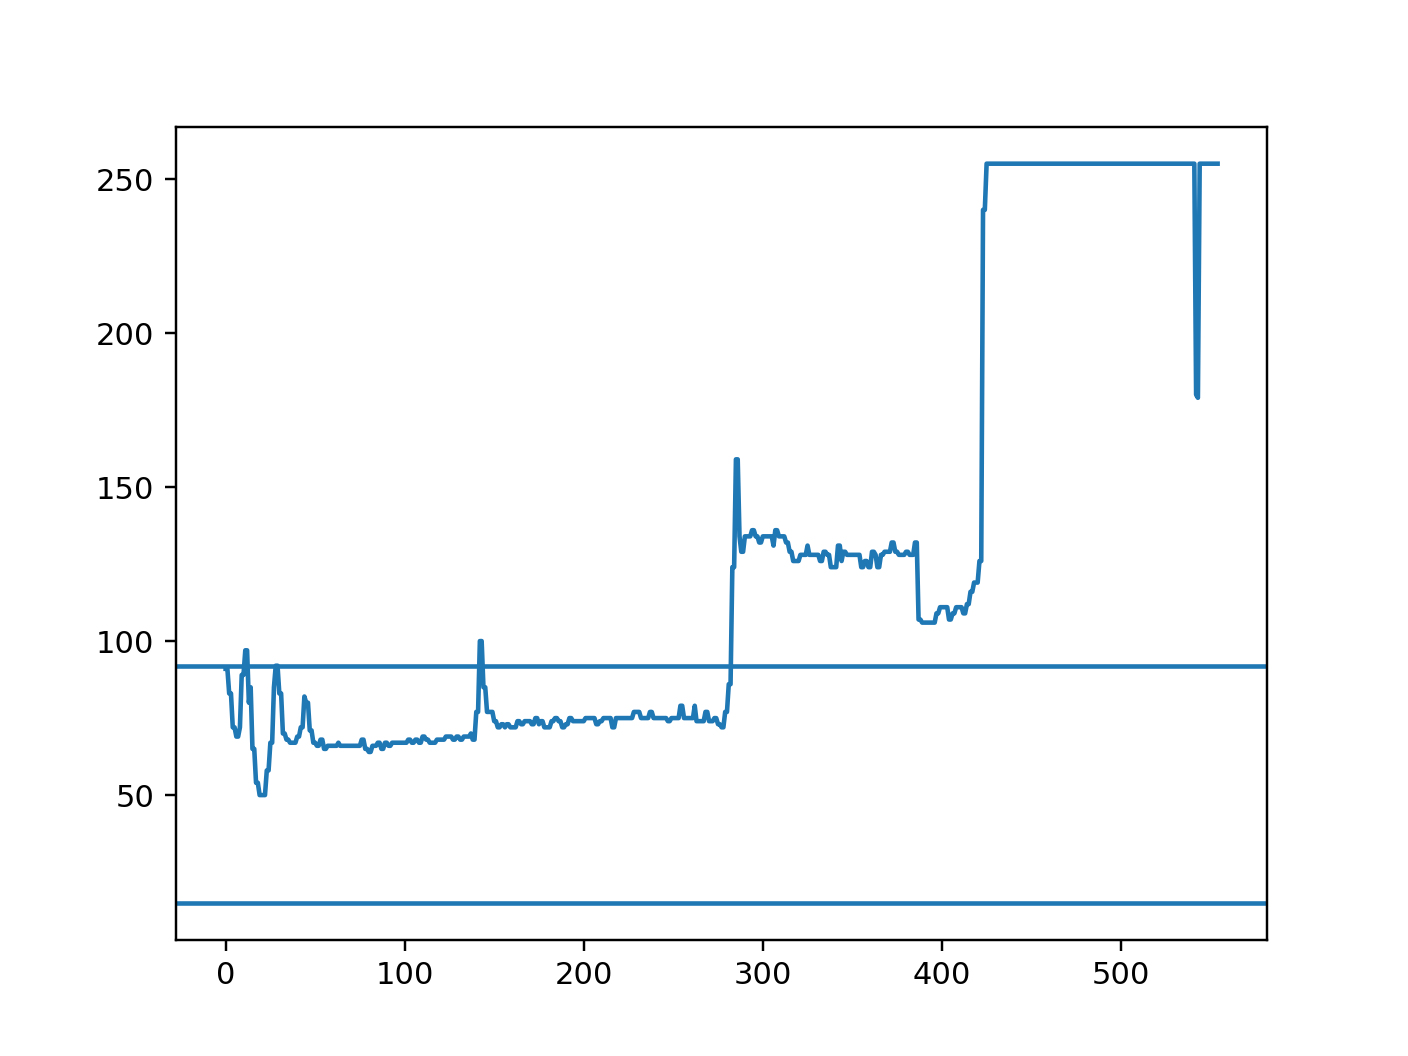

In [228]:
plt.figure()
plt.plot(lc)
plt.axhline(med)
plt.axhline(pmed)

<IPython.core.display.Javascript object>


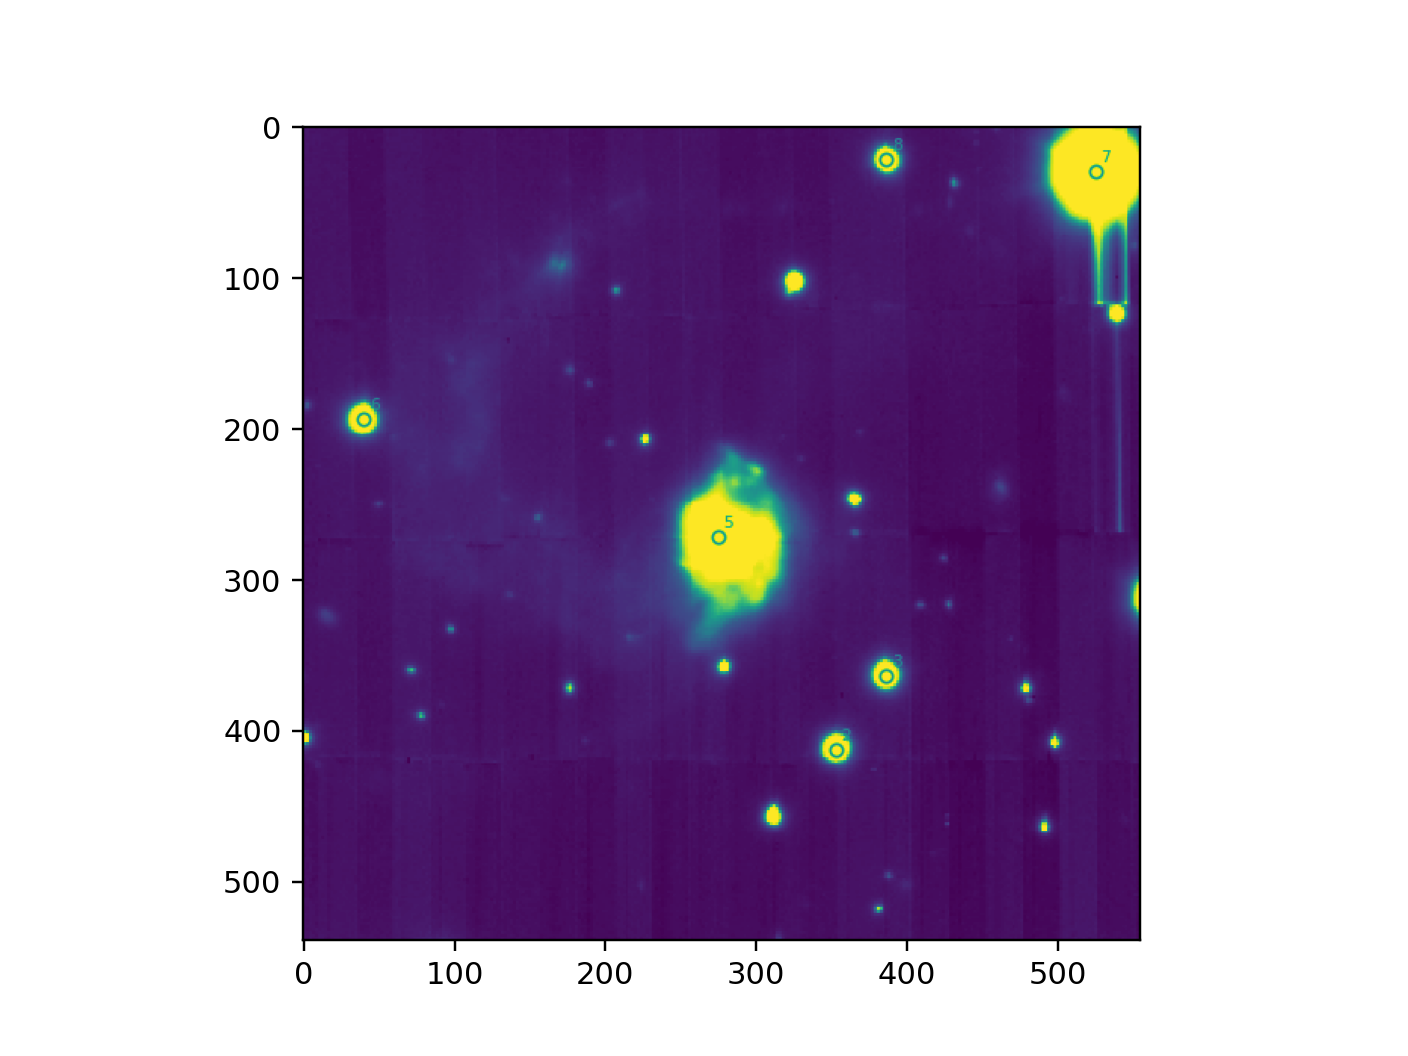

In [15]:
plt.figure()
plt.imshow(cutout)

In [ ]:
x1 = 106+20; x2 = 701-20
y1 = 150+20; y2 = 729-20

for file in files:
    try:
        image = cv2.imread(file,0)
        cutout = image[y1:y2,x1:x2]
        name = 'sat_streaks/' + file.split('/')[-1]
        sat = sat_killer(1,1,run=False)
        sat.quick_detection(cutout,10,savename=name)
    except:
        print('junk: ',file)

In [ ]:
sats = glob('sat_streaks_real/*.png')

In [ ]:
import os

In [ ]:
for sat in sats:
    name = 'muse_preview_archive/' + sat.split('/')[-1]
    os.system(f'cp {name} muse_archive_sats')

In [ ]:
sat.threshold

In [26]:
sat = sat_killer(1,1,run=False)
sat.image = cutout
sat._set_threshold(3)
print(sat.threshold)

29.443864080100575


In [27]:
sat._dilate()
sat._edges()
sat._lines()
#sat._match_lines()
#sat.make_mask()
#sat._detected()

In [28]:
sat.lines

[]

In [137]:
from starkiller import *

In [23]:
lines = cv2.HoughLinesP(sat.edges, # Input edge image
                        1, # Distance resolution in pixels
                        np.pi/180, # Angle resolution in radians
                        threshold=100, # Min number of votes for valid line
                        minLineLength=100, # Min allowed length of line
                        maxLineGap=50 # Max allowed gap between line for joining them
                        )

<IPython.core.display.Javascript object>


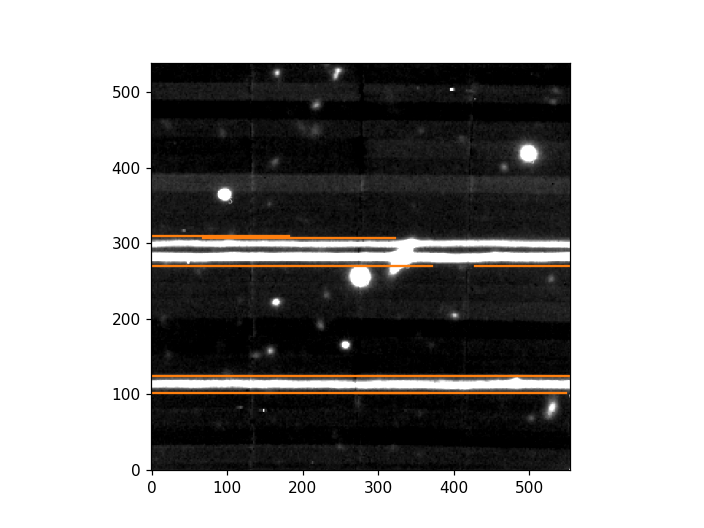

In [24]:
plt.figure()
plt.imshow(sat.image,origin='lower',cmap='gray',vmin=np.nanpercentile(sat.image,16),vmax=np.nanpercentile(sat.image,95))
for line in lines:
   x1, y1, x2, y2 = line[0]
   plt.plot([x1,x2],[y1,y2],'C1')

In [28]:
sat._match_lines(close=5,minlines=0)

AttributeError: 'sat_killer' object has no attribute 'streak_coef'

In [26]:
sat.streak_coef

AttributeError: 'sat_killer' object has no attribute 'streak_coef'

<IPython.core.display.Javascript object>


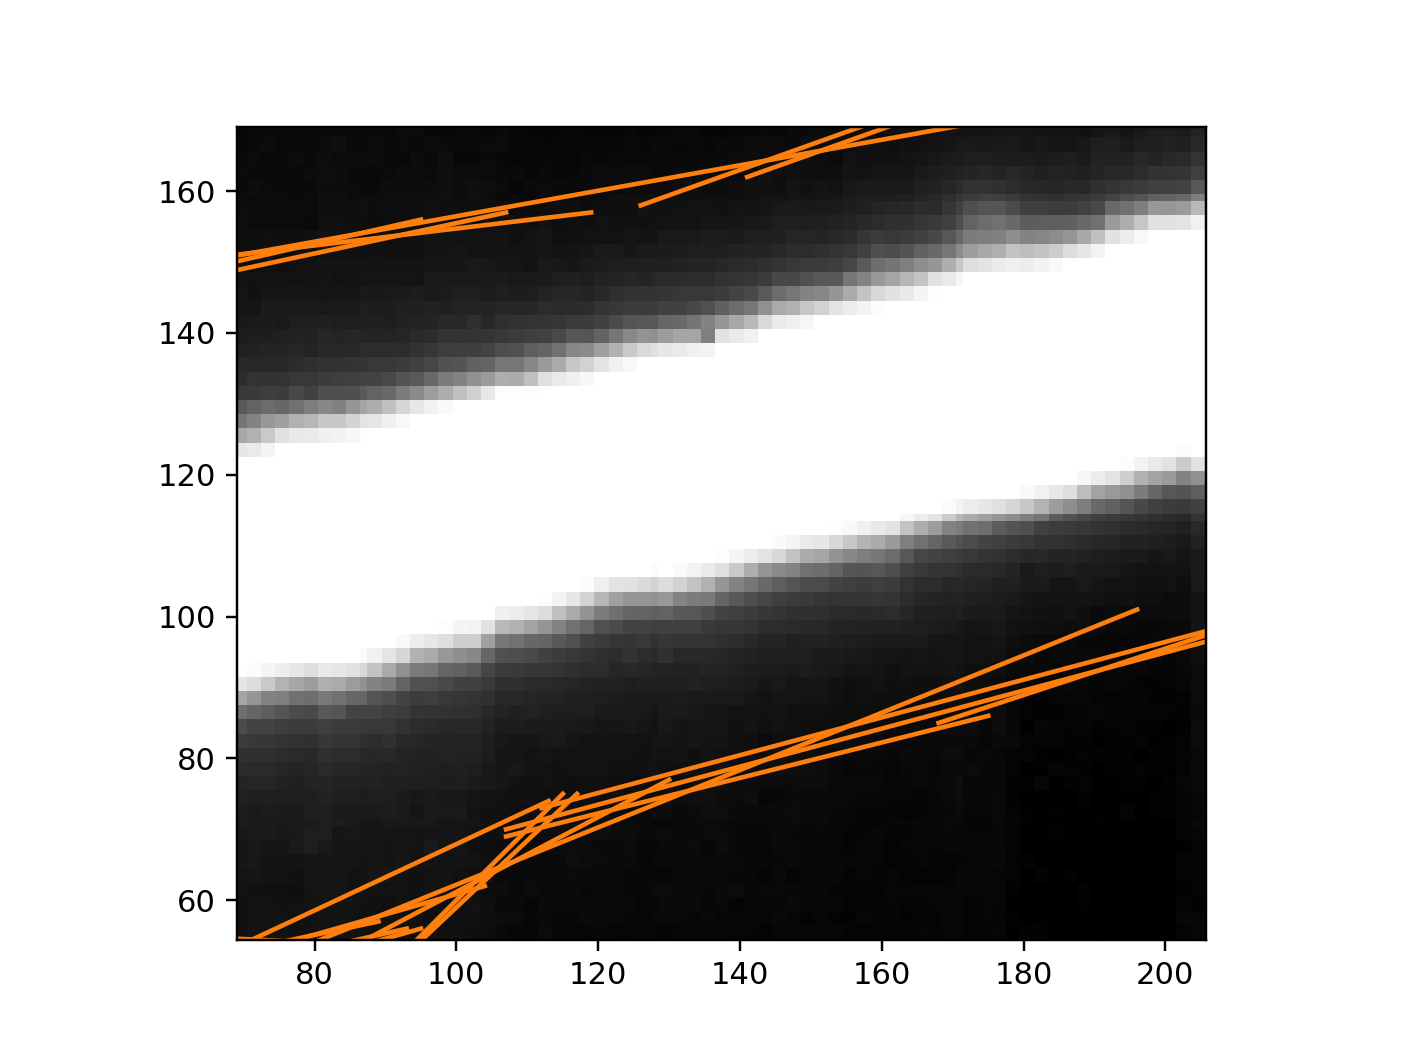

<IPython.core.display.Javascript object>


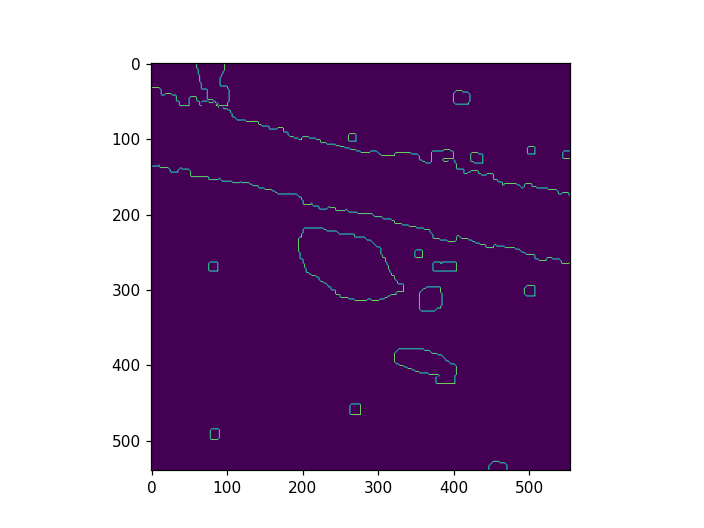

In [46]:
plt.figure()
plt.imshow(sat.edges)

In [30]:
sat.lines

[]

In [48]:
coefs = []
xs = []
ys = []
for line in sat.lines:
    x1, y1, x2, y2 = line[0]
    xs += [[x1,x2]]
    ys += [[y1,y2]]
    coefs += [np.polyfit([x1,x2], [y1,y2], 1)]
coefs = np.array(coefs)
xs = np.array(xs); ys = np.array(ys)
xx = np.arange(np.min(xs),np.max(xs),1)
yy = []
for c in coefs:
    yy += [xx*c[0]+c[1]]
yy = np.array(yy)

'''
new_coefs = []

used = np.zeros(len(yy))
for i in range(len(yy)):
    if not used[i]:
        diff = abs(yy[np.newaxis,i] - yy)
        diff = np.nanmedian(diff,axis=1)
        ind = diff < y_close
        new_coefs += [np.nanmean(coefs[ind],axis=0)]
        used[ind] = 1

new_coefs = np.array(new_coefs)'''

'\nnew_coefs = []\n\nused = np.zeros(len(yy))\nfor i in range(len(yy)):\n    if not used[i]:\n        diff = abs(yy[np.newaxis,i] - yy)\n        diff = np.nanmedian(diff,axis=1)\n        ind = diff < y_close\n        new_coefs += [np.nanmean(coefs[ind],axis=0)]\n        used[ind] = 1\n\nnew_coefs = np.array(new_coefs)'

In [338]:
sat.line_coefs = coefs

In [343]:
xxx = np.zeros_like(yy)
xxx[:] = xx

ind = (yy<0) | (yy > sat.image.shape[0])

yyy = deepcopy(yy)
yyy[ind] = np.nan

close = 30
nlines = 1

def match_lines(sat,close=30,minlines=1):
    x = np.arange(0,sat.image.shape[1],0.5)
    yy = []
    for c in sat.line_coefs:
        yy += [x*c[0]+c[1]]
    yy = np.array(yy)

    xx = np.zeros_like(yy)
    xx[:] = x
    
    
    ind = (yy<0) | (yy > sat.image.shape[0])
    yy[ind] = np.nan
    
    d = np.sqrt((yy[:,np.newaxis,:,np.newaxis] - yy[np.newaxis,:,np.newaxis,:])**2 
                + (xx[:,np.newaxis,:,np.newaxis] - xx[np.newaxis,:,np.newaxis,:])**2)
    d[d==0] = np.nan

    dmatrix = np.nanmean(np.nanmin(d,axis=2),axis=2)
    np.fill_diagonal(dmatrix,0)
    d_bool = dmatrix < close
    d_bool = np.unique(d_bool,axis=0)
    ind = np.sum(d_bool,axis=1) > minlines
    d_bool = d_bool[ind]

    n_coefs =[]
    for i in d_bool:
        n_coefs += [np.nanmean(coefs[i],axis=0)]
    n_coefs = np.array(n_coefs)
    return n_coefs

In [344]:
match_lines(sat,close)

array([[   11.54024768, -3859.43343653]])

In [345]:
sat.line_coefs

array([[ 6.86274510e-02,  1.24529412e+02],
       [ 1.17647059e+01, -4.05023529e+03],
       [ 1.13157895e+01, -3.66863158e+03]])

In [ ]:
sat.

In [335]:
n_coefs

array([[   11.54024768, -3859.43343653]])

<IPython.core.display.Javascript object>


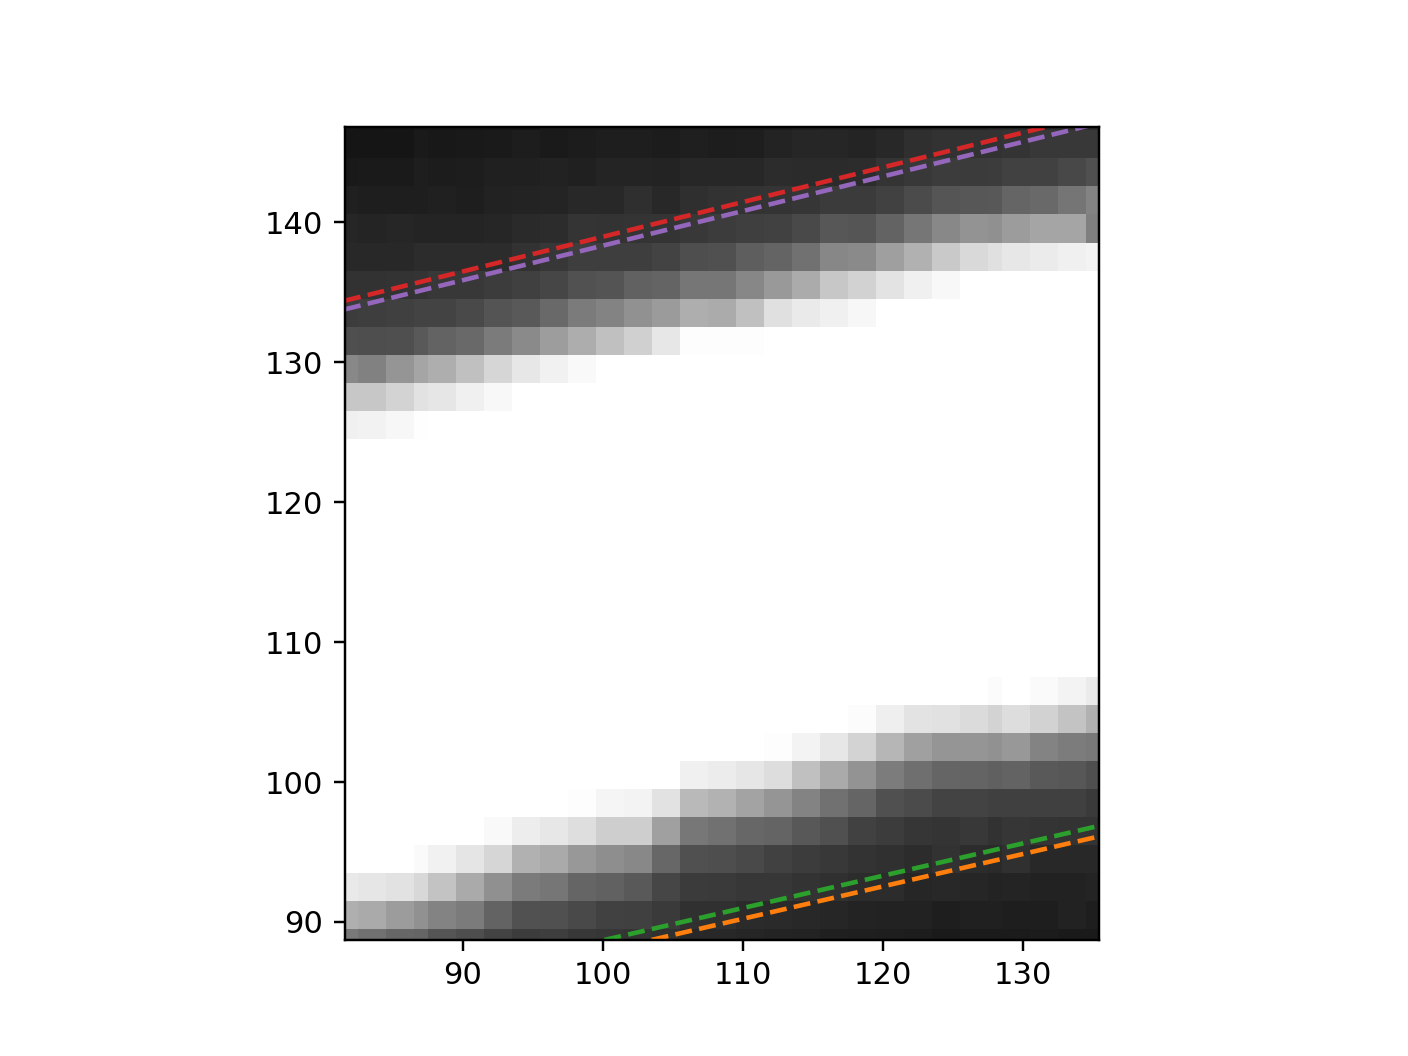

In [50]:
plt.figure()
plt.imshow(sat.image,origin='lower',cmap='gray',vmin=np.nanpercentile(sat.image,16),vmax=np.nanpercentile(sat.image,95))
#for line in sat.lines:
#    x1, y1, x2, y2 = line[0]
#    plt.plot([x1,x2],[y1,y2])
counter = 1
for c in coefs:
    xx = np.arange(0,sat.image.shape[1],0.5)
    yy = xx*c[0] + c[1]
    plt.plot(xx,yy,f'C{counter}--',label=f'Sat {counter}')
    counter += 1
#plt.plot(xx,xx*n_coefs[0,0] + n_coefs[0,1])

In [328]:
np.nanmean(coefs[d_bool[0]],axis=0)

array([   11.54024768, -3859.43343653])

In [50]:
dy_n = (coefs[:,1][np.newaxis,:] * coefs[:,0][np.newaxis,:] - coefs[:,1][:,np.newaxis] * coefs[:,0][:,np.newaxis])
d_d = (coefs[:,0][:,np.newaxis]*coefs[:,0][np.newaxis,:]+1)
dy = (dy_n/d_d)
dx = ((coefs[:,1][:,np.newaxis] - coefs[:,1][np.newaxis,:])/d_d)

NameError: name 'coefs' is not defined

In [51]:
d = np.sqrt(dy**2+dx**2)

NameError: name 'dy' is not defined

In [183]:
coefs[:,0][:,np.newaxis]*coefs[:,0][np.newaxis,:]

array([[  1.00470973,   1.80738178,   1.77657379],
       [  1.80738178, 139.4083045 , 134.12693498],
       [  1.77657379, 134.12693498, 129.04709141]])

In [184]:
d_d = np.sqrt(coefs[:,0][:,np.newaxis]*coefs[:,0][np.newaxis,:]+1)
abs(coefs[:,1][:,np.newaxis] - coefs[:,1][np.newaxis,:]) / d_d

array([[   0.        , 3105.32495733, 2845.83456927],
       [3105.32495733,    0.        ,   32.94993741],
       [2845.83456927,   32.94993741,    0.        ]])

In [189]:
coefs

array([[ 6.86274510e-02,  1.24529412e+02],
       [ 1.17647059e+01, -4.05023529e+03],
       [ 1.13157895e+01, -3.66863158e+03]])

<IPython.core.display.Javascript object>


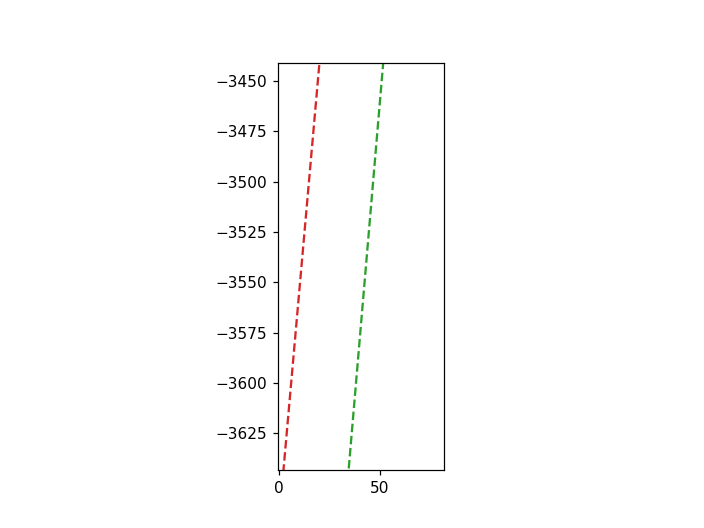

In [70]:
plt.figure()
plt.imshow(sat.image,origin='lower',cmap='gray',vmin=np.nanpercentile(sat.image,16),vmax=np.nanpercentile(sat.image,95))
#for line in sat.lines:
#    x1, y1, x2, y2 = line[0]
#    plt.plot([x1,x2],[y1,y2])
counter = 1
for c in coefs:
    xx = np.arange(0,sat.image.shape[1],0.5)
    yy = xx*c[0] + c[1]
    plt.plot(xx,yy,f'C{counter}--',label=f'Sat {counter}')
    counter += 1

In [324]:
from copy import deepcopy
xxx = np.zeros_like(yy)
xxx[:] = xx

In [321]:
yy[0]

array([146.83333333, 146.90196078, 146.97058824, 147.03921569,
       147.10784314, 147.17647059, 147.24509804, 147.31372549,
       147.38235294, 147.45098039, 147.51960784, 147.58823529,
       147.65686275, 147.7254902 , 147.79411765, 147.8627451 ,
       147.93137255, 148.        , 148.06862745, 148.1372549 ,
       148.20588235, 148.2745098 , 148.34313725, 148.41176471,
       148.48039216, 148.54901961, 148.61764706, 148.68627451,
       148.75490196, 148.82352941, 148.89215686, 148.96078431,
       149.02941176, 149.09803922, 149.16666667, 149.23529412,
       149.30392157, 149.37254902, 149.44117647, 149.50980392,
       149.57843137, 149.64705882, 149.71568627, 149.78431373,
       149.85294118, 149.92156863, 149.99019608, 150.05882353,
       150.12745098, 150.19607843, 150.26470588, 150.33333333,
       150.40196078, 150.47058824, 150.53921569, 150.60784314,
       150.67647059, 150.74509804, 150.81372549, 150.88235294,
       150.95098039, 151.01960784, 151.08823529, 151.15

In [53]:
yyy = deepcopy(yy)
yyy[ind] = np.nan


NameError: name 'yy' is not defined

<IPython.core.display.Javascript object>


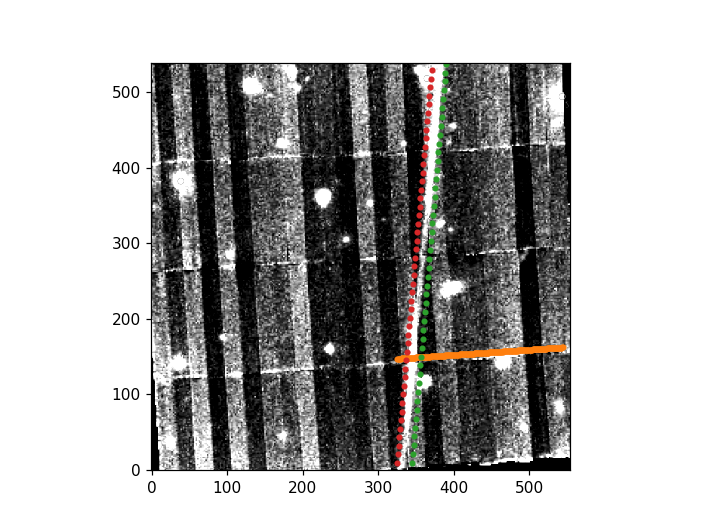

In [151]:
plt.figure()
plt.imshow(sat.image,origin='lower',cmap='gray',vmin=np.nanpercentile(sat.image,16),vmax=np.nanpercentile(sat.image,95))
#for line in sat.lines:
#    x1, y1, x2, y2 = line[0]
#    plt.plot([x1,x2],[y1,y2])
counter = 1
for c in yyy:
    plt.plot(xx,c,f'C{counter}.',label=f'Sat {counter}')
    counter += 1

In [188]:
yyy[1]

array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
         8.58823529,  20.35294118,  32.11764706,  43.88235294,
        55.64705882,  67.41176471,  79.17647059,  90.94117647,
       102.70588235, 114.47058824, 126.23529412, 138.        ,
       149.76470588, 161.52941176, 173.29411765, 185.05882353,
       196.82352941, 208.58823529, 220.35294118, 232.11764706,
       243.88235294, 255.64705882, 267.41176471, 279.17647059,
       290.94117647, 302.70588235, 314.47058824, 326.23529412,
       338.        , 349.76470588, 361.52941176, 373.29411765,
       385.05882353, 396.82352941, 408.58823529, 420.35294118,
       432.11764706, 443.88235294, 455.64705882, 467.41176471,
       479.17647059, 490.94117647, 502.70588235, 514.47

In [256]:
yyy = deepcopy(yy)
yyy[ind] = np.nan
eh = np.sqrt((yyy[np.newaxis,:,np.newaxis] - yyy[np.newaxis,:,np.newaxis,:])**2 + (xxx[:,np.newaxis,:,np.newaxis] - xxx[np.newaxis,:,np.newaxis,:])**2)

In [278]:
b = np.sqrt((yyy[:,np.newaxis] - yyy[2][np.newaxis,:,np.newaxis])**2 + (xxx[:,np.newaxis] - xxx[0][np.newaxis,:,np.newaxis])**2)
b[b==0] = np.nan

In [279]:
np.nanmean(np.nanmin(b[1],axis=0))

19.432234209340294

<IPython.core.display.Javascript object>


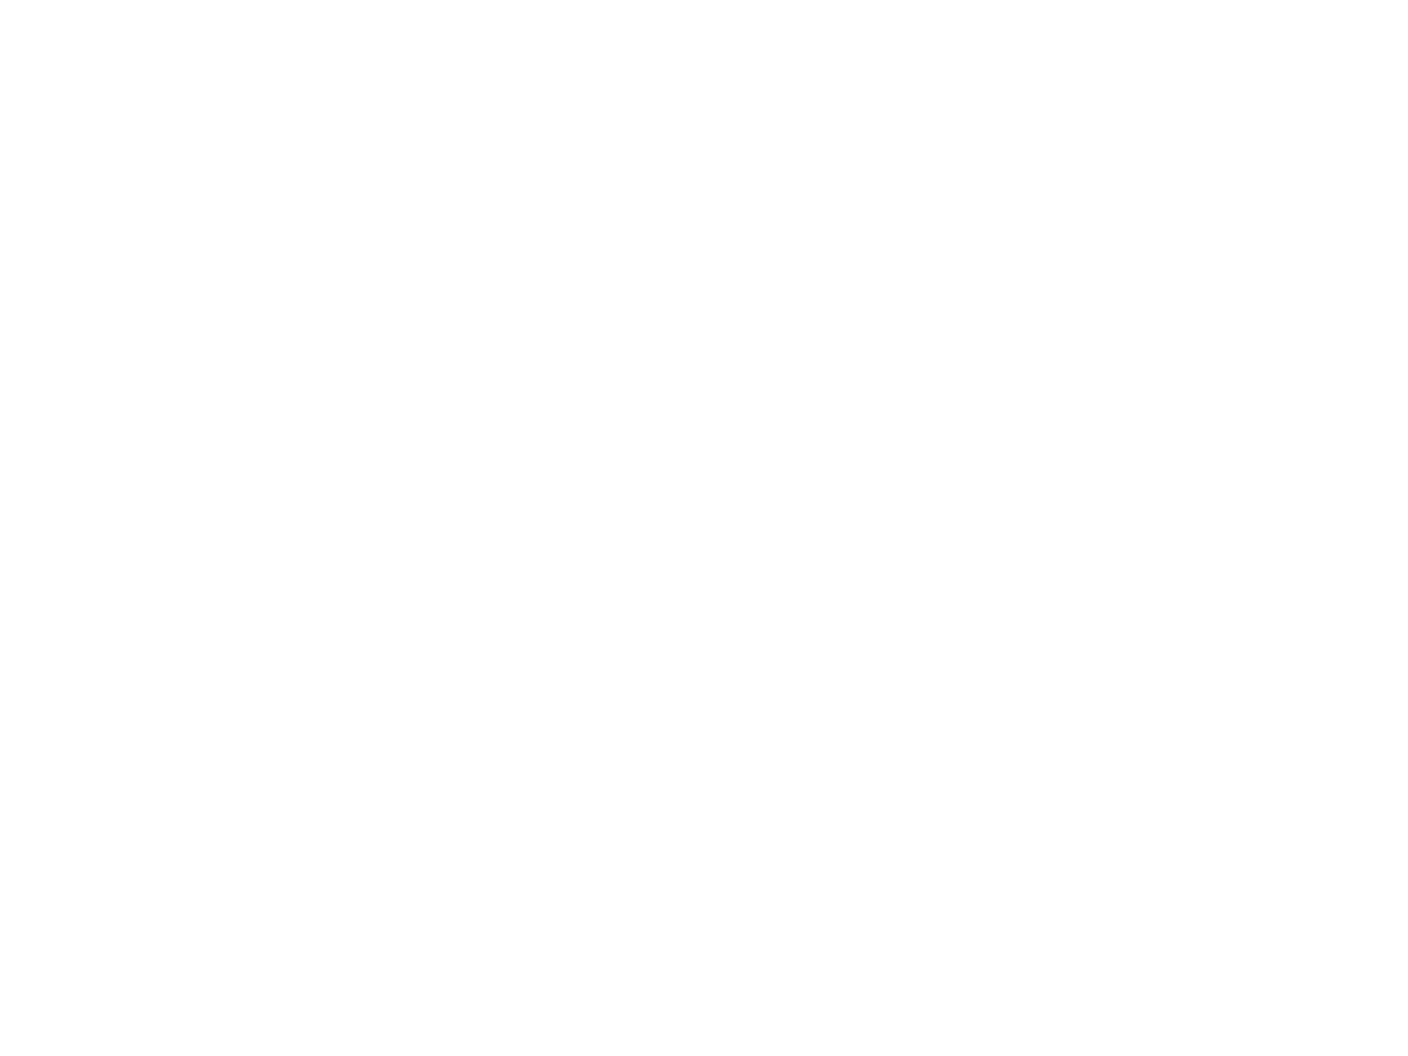

NameError: name 'b' is not defined

In [49]:
plt.figure()
plt.imshow(b[1])

In [52]:
b = np.sqrt((yyy[:,np.newaxis,np.newaxis] - yyy[np.newaxis,:,np.newaxis,:,np.newaxis])**2 + (xxx[:,np.newaxis,np.newaxis] - xxx[np.newaxis,:,np.newaxis,:,np.newaxis])**2)
b[b==0] = np.nan


NameError: name 'yyy' is not defined

In [274]:
yyy.shape

(3, 221)

In [283]:
((yyy[:,:,np.newaxis] - yyy[2][np.newaxis,:])**2).shape

(3, 221, 221)

In [284]:
((yyy[:,np.newaxis,:,np.newaxis] - yyy[np.newaxis,:,np.newaxis,:])**2).shape

(3, 3, 221, 221)

In [288]:
c = np.sqrt((yyy[:,np.newaxis,:,np.newaxis] - yyy[np.newaxis,:,np.newaxis,:])**2 + (xxx[:,np.newaxis,:,np.newaxis] - xxx[np.newaxis,:,np.newaxis,:])**2)
c[c==0] = np.nan


In [322]:
close = 30
nlines = 1

c = np.sqrt((yyy[:,np.newaxis,:,np.newaxis] - yyy[np.newaxis,:,np.newaxis,:])**2 
            + (xxx[:,np.newaxis,:,np.newaxis] - xxx[np.newaxis,:,np.newaxis,:])**2)
c[c==0] = np.nan

dmatrix = np.nanmean(np.nanmin(c,axis=2),axis=2)
np.fill_diagonal(dmatrix,0)
d_bool = dmatrix < close
d_bool = np.unique(d_bool,axis=0)
ind = np.sum(d_bool,axis=1) > nlines
d_bool = d_bool[ind]

In [323]:
d_bool

array([[False,  True,  True]])

In [297]:
np.fill_diagonal(dmatrix,0)

In [299]:
d_bool = dmatrix < 20

In [307]:
d_bool = np.unique(d_bool,axis=0)


In [302]:
np.unique(d_bool,axis=1)a
db

array([[False,  True],
       [ True, False],
       [ True, False]])

In [ ]:
np.nanmin

In [272]:
c = yyy[:,np.newaxis,np.newaxis] - yyy[np.newaxis,:,np.newaxis,:,np.newaxis]

In [273]:
c.shape

(1, 3, 1, 221, 1)

In [268]:
b.shape

(1, 3, 1, 221, 221)

In [ ]:
for l in yyy:
    yyy[:,np.newaxis] - l[]

In [201]:
eh.shapea


(3, 3, 221, 221)

In [209]:
eh[:,:,10,1]

array([[9., 9., 9.],
       [9., 9., 9.],
       [9., 9., 9.]])

In [192]:
a = np.nanmin(eh,axis=2)

In [193]:
a.shape

(3, 3, 221)

In [194]:
np.nanmedian(a,axis=2)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [195]:
eh.shape

(3, 3, 221, 221)

In [42]:
coefs[:,0][:,np.newaxis]*coefs[:,0][np.newaxis,0]

array([[0.00470973],
       [0.80738178],
       [0.77657379]])

In [ ]:
import numpy as np


In [ ]:
plt.figure()
plt.imshow(sat.image,origin='lower',cmap='gray',vmin=np.nanpercentile(sat.image,16),vmax=np.nanpercentile(sat.image,95))
for line in sat.lines:
    x1, y1, x2, y2 = line[0]
    plt.plot([x1,x2],[y1,y2],'C1')

In [ ]:
sat.plot_lines()
#plt.savefig('thumbnail_test.png')